In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D
from keras.optimizers import Adam


In [5]:
# seed 값 고정
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [6]:
fa_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fa_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
# X_train = X_train.reshape((60000, 28, 28, 1))
# X_test = X_test.reshape((10000, 28, 28, 1))
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1),padding='same'))
model.add(MaxPooling2D((2,2)))
# model.add(Conv2D(64, (3,3), activation='relu',padding='same'))
# model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu',padding='same'))
# 평탄화
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [9]:
%%time
model.fit(X_train, y_train, epochs=10,
          validation_data=(X_test, y_test))
model.evaluate(X_test,y_test)

Epoch 1/10
1875/1875 [==============================] - 23s 5ms/step - loss: 0.4652 - accuracy: 0.8340 - val_loss: 0.3056 - val_accuracy: 0.8910
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2852 - accuracy: 0.8987 - val_loss: 0.3026 - val_accuracy: 0.8910
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2350 - accuracy: 0.9159 - val_loss: 0.2518 - val_accuracy: 0.9108
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2023 - accuracy: 0.9259 - val_loss: 0.2330 - val_accuracy: 0.9177
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1782 - accuracy: 0.9355 - val_loss: 0.2484 - val_accuracy: 0.9163
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1548 - accuracy: 0.9438 - val_loss: 0.2349 - val_accuracy: 0.9201
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1350 - accuracy: 0.9514 - val_loss: 0.2518 - val_accura

[0.2592325508594513, 0.9243999719619751]

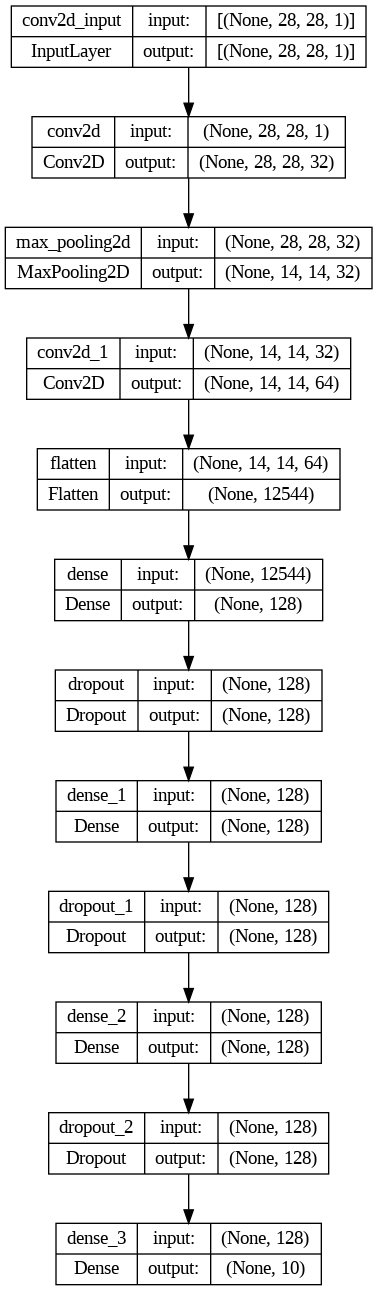

In [10]:
tf.keras.utils.plot_model(model, show_shapes=True)